# [Data Cleaning](https://www.kaggle.com/learn/data-cleaning)

## [Missiong values](https://www.kaggle.com/code/alexisbcook/handling-missing-values)

we'll use a dataset of events that occured in American Football games

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# read in all our data
nfl_data = pd.read_csv("data/nfl_play_mini.csv")

# set seed for reproducibility
np.random.seed(0)

# look at the first five rows of the nfl_data file. 
# I can see a handful of missing data already!
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


### Count missing data

In [2]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date              0
GameID            0
Drive             0
qtr               0
down            354
time              0
TimeUnder         0
TimeSecs          0
PlayTimeDiff      0
SideofField       3
dtype: int64

### Percentage of missiong data

In [32]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'Missing rate: {percent_missing:.2f}%')

Missing rate: 27.67%


### Why are missing
If value is missing because
* it doesn't exist<br>
  value doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be.
  These values you probably do want to keep as NaN.
* it wasn't recorded<br>
  try to guess the value based on the data in that column and row. This is called imputation, and we'll learn how to do it next!


### Drop missing values
If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. 

> It not recommended for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.

In [4]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oh dear, it looks like that's removed all our data! 😱 

This is because every row in our dataset had at least one missing value. We might change to removing all the columns that have at least one missing value instead.

In [5]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,ydstogo,ydsnet,...,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,Season
0,2009-09-10,2009091000,1,1,15:00,15,3600.0,0,0,0,...,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2009
1,2009-09-10,2009091000,1,1,14:53,15,3593.0,7,10,5,...,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,2009
2,2009-09-10,2009091000,1,1,14:16,15,3556.0,37,5,2,...,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,2009
3,2009-09-10,2009091000,1,1,13:35,14,3515.0,41,8,2,...,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,2009
4,2009-09-10,2009091000,1,1,13:27,14,3507.0,8,8,2,...,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2009


In [6]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 49


We've lost quite a bit of data, but at this point we have successfully removed all the NaN's from our data.

### Filling in missing values automatically


In [7]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Or I could replace missing values with the value comes directly blow it in the same column. 
It makes sense for datasets where the observations have some sort of logical order to them.

In [9]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

/var/folders/1h/vlrnbgl95c9977yrrq362r880000gn/T/ipykernel_66220/3049679174.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Remove duplicates
### Get number of duplicates

In [10]:
have_duplicate_df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
have_duplicate_df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [11]:
duplicates = have_duplicate_df[have_duplicate_df.duplicated()]
display(duplicates)
n_duplicates = duplicates.shape[0]

print(f"Total number of duplicate: {n_duplicates}")

,brand,style,rating
1,Yum Yum,cup,4.0


Total number of duplicate: 1


### Drop duplicates

In [12]:
no_duplicate_df = have_duplicate_df.drop_duplicates()
no_duplicate_df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


## [Scaling and Normalization](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization)

In [13]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from sklearn.preprocessing import minmax_scale

# set seed for reproducibility
np.random.seed(0)

### Scaling vs. Normalization
* **Scaling** changes the range of data so that it fits within a specific scale, like 0-100 or 0-1.
* **Normalization** changes the shape of the distribution of the data

### Scaling

[-0.81418613 -0.70670244 -0.78443346 -0.8162125  -0.87138523 -0.75758074
 -0.8656681  -0.48064195 -0.22565925 -0.88714284]


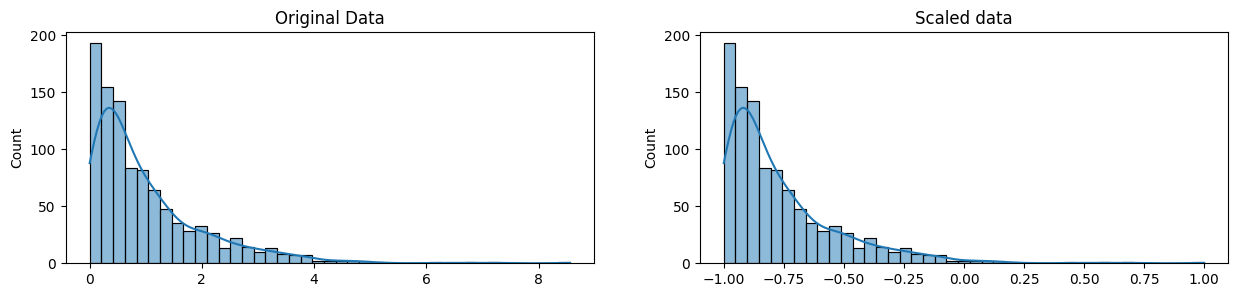

In [14]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scale(
    original_data,
    feature_range=(-1, 1),  # set data range (min, max)
    axis=0,                 # scale each column independently
)

print(scaled_data[:10])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

> Notice that NO change on `shape`, but data `range` has been changed from `[0, 8]` to `[-1, 1]`

### Normalization

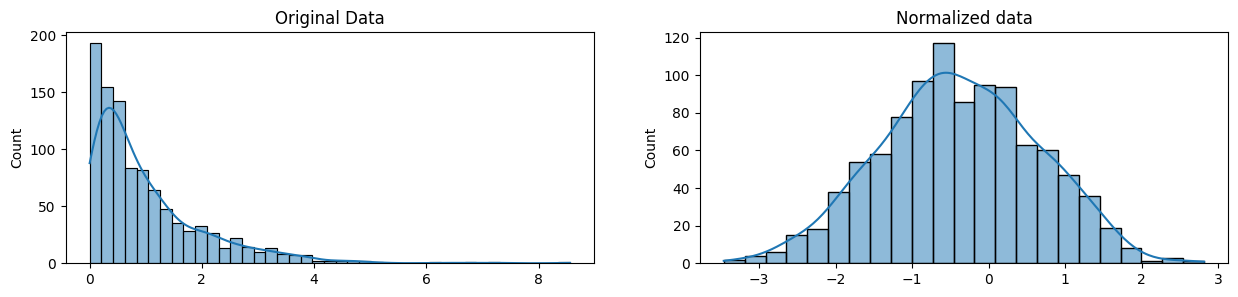

In [15]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
ax[0].set_title("Original Data")
sns.histplot(
    original_data, 
    ax=ax[0], 
    kde=True, 
    legend=False
)

ax[1].set_title("Normalized data")
sns.histplot(
    normalized_data[0], 
    ax=ax[1], 
    kde=True, 
    legend=False
)

plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

## [Parsing Dates](https://www.kaggle.com/code/alexisbcook/parsing-dates)

In [16]:
import datetime


# read in our data
landslides = pd.read_csv("data/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

# Show data
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


### Convert date columns to datetime

In [17]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(
    landslides['date'], 
    format="%m/%d/%y"
)

In [18]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

If there are multiple date format, set `format='mixed'`

In [19]:
pd.to_datetime(['12-01-2000 00:00:00', '2024/12/24', '09/13/2025'], format='mixed')

DatetimeIndex(['2000-12-01', '2024-12-24', '2025-09-13'], dtype='datetime64[ns]', freq=None)

### Select the day of the month

In [20]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

### Plot the day of the month to check the date parsing
One of the biggest dangers in parsing dates is mixing up the months and days. Let's plot a histogram of the days of the month to double check it.

<Axes: xlabel='date_parsed', ylabel='Count'>

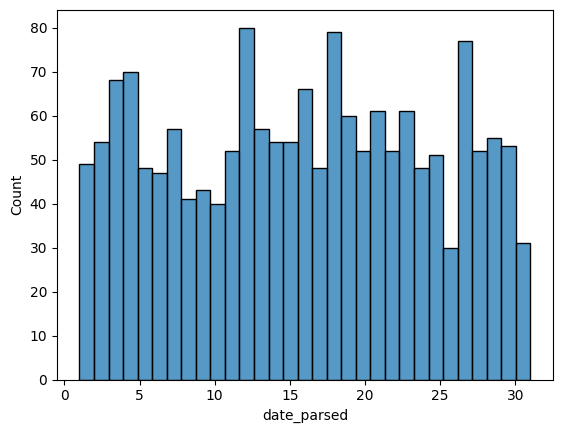

In [21]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(day_of_month_landslides, kde=False, bins=31)

## [Character Encodings](https://www.kaggle.com/code/alexisbcook/character-encodings)

### Encode and decode

In [22]:
# helpful character encoding module
import charset_normalizer


# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is str
type(before)

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type=bytes and value
print(f"type(after)=${type(after)}, after=${after} \n")


# convert it back to utf-8
print(f'Converted back: ${after.decode("utf-8")} \n')


type(after)=$<class 'bytes'>, after=$b'This is the euro symbol: \xe2\x82\xac' 

Converted back: $This is the euro symbol: € 



It will throws an error when we try to use a different encoding to map our bytes into a string. It's far better to convert all our text to UTF-8 as soon as we can.

In [23]:
# try to decode our bytes with the ascii encoding
try:
    print(after.decode("ascii"))
except Exception as error:
    print(error)

'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)


### Detect encoding from binary array

We can use [<u>charset_normalizer.detect()</u>](https://charset-normalizer.readthedocs.io/en/stable/api.html#charset_normalizer.detect) to find what exact encoding for the binary input. See an example below:

In [24]:
my_byte_str = 'Bonjour, je suis à la recherche d\'une aide sur les étoiles'.encode('cp1252')
result = charset_normalizer.detect(my_byte_str)
print(result)

{'encoding': 'windows-1250', 'language': 'Portuguese', 'confidence': 1.0}


It found encoding is 'windows-1250' and confidence=1.0 means 100% sure for the detected result.
Let's decode and print it.

In [25]:
my_byte_str.decode('windows-1250')

"Bonjour, je suis ŕ la recherche d'une aide sur les étoiles"

If input is a file, then we can detect encoding as shown below:

```python
# 1. Look at the first ten thousand bytes to guess the character encoding
with open("data/ks-projects-201801.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# 2. Check what the character encoding might be
print(result)

# Output:
# {'encoding': 'Windows-1252', 'language': 'English', 'confidence': 0.73}


# 3. Read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("data/ks-projects-201612.csv", encoding='Windows-1252')
```

### Save file to utf-8
Finally, you should save the decoded file into utf-8 encoding.
```python
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")
```

## [Inconsistent Data Entry](https://www.kaggle.com/code/alexisbcook/inconsistent-data-entry/data)

Some common examples of inconsistent data entry include:

* Inconsistent capitial cases: e.g. ' Germany', and 'germany'
* Leading or tailing blank spaces, e.g. ' New Zealand' and 'New Zealand'
* Misspellings: Variations in spelling of the same entity (e.g., "Jon" vs. "John", 'south korea' vs 'southkorea').

Take professors dataset for example:

In [26]:
# read in all our data
professors = pd.read_csv("data/pakistan_intellectual_capital.csv")

def to_categories(category: pd.Series) -> pd.Series:
    # get all unique values for
    c = category.unique()
    # sort them alphabetically and then take a closer look
    c.sort()
    return c


to_categories(professors['Country'])

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

We can lower case and strip countries to resolve the first two types of issues.

In [27]:
professors['Country'] = professors['Country'].str.lower()
professors['Country'] = professors['Country'].str.strip()

countries = to_categories(professors['Country'])
display(countries)

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

#### Fuzzy matching

We're going to use the [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy) package to help identify which strings are closest to each other. 

In [28]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process

# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract(
    "south korea", 
    countries, 
    limit=10, 
    scorer=fuzzywuzzy.fuzz.token_sort_ratio
)

# take a look at them
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('austria', 33),
 ('ireland', 33),
 ('pakistan', 32),
 ('portugal', 32),
 ('scotland', 32),
 ('australia', 30)]

We can see that "south korea" and "southkorea" are very close to "south korea". Let's replace all rows in our "Country" column that have a ratio of > 47 with "south korea".

In [29]:
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [30]:
# replace close matches to "south korea"
replace_matches_in_column(
    df=professors, 
    column='Country', 
    string_to_match="south korea"
)

All done!


Verify the result and find there's only one 'south korea' in professors dataset now.

In [31]:
to_categories(professors['Country'])

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)